# Data scraping project using YouTube API


## Importing libraries and setting API key

In [61]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [58]:
api_key = 'YOUR API HERE'
channel_id = 'UCbulh9WdLtEXiooRcYK7SWw'

youtube = build('youtube', 'v3', developerKey=api_key)

## Extracting channel statistics

In [11]:
# Function that makes request to channel via API
def channel_stats(youtube, channel_id):
    
    request = youtube.channels().list(part='snippet,contentDetails,statistics', id=channel_id)
    response = request.execute()
    
    return response    

In [12]:
# Here is the channel info in JSON format
channel_stats(youtube, channel_id)

{'kind': 'youtube#channelListResponse',
 'etag': 'bNZN3ihjyG_qz-URURBEo4vsH4w',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': '56uRUf9bxNq2oW00NlnQm9x2fZM',
   'id': 'UCbulh9WdLtEXiooRcYK7SWw',
   'snippet': {'title': 'Metallica',
    'description': 'The Official Metallica YouTube Channel',
    'customUrl': 'metallica',
    'publishedAt': '2007-01-30T00:12:55Z',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ZjcQii3sVKaPcGK3rIm8vot-qwdmm7KAHsWCjlQLsDLa_tm2kykM-Lgmty1IwQWehj7nEzXPUA=s88-c-k-c0x00ffffff-no-nd-rj',
      'width': 88,
      'height': 88},
     'medium': {'url': 'https://yt3.ggpht.com/ZjcQii3sVKaPcGK3rIm8vot-qwdmm7KAHsWCjlQLsDLa_tm2kykM-Lgmty1IwQWehj7nEzXPUA=s240-c-k-c0x00ffffff-no-nd-rj',
      'width': 240,
      'height': 240},
     'high': {'url': 'https://yt3.ggpht.com/ZjcQii3sVKaPcGK3rIm8vot-qwdmm7KAHsWCjlQLsDLa_tm2kykM-Lgmty1IwQWehj7nEzXPUA=s800-c-k-c0x00ffffff-no-nd-rj',
      'width': 800,
   

In [13]:
# Now let's change the function a little bit to grab the necessary information
def channel_stats(youtube, channel_id):
    
    request = youtube.channels().list(part='snippet,contentDetails,statistics', id=channel_id)
    response = request.execute()
    
    data = dict(Channel_name = response['items'][0]['snippet']['title'],
                 Subs_count = response['items'][0]['statistics']['subscriberCount'],
                 Views = response['items'][0]['statistics']['viewCount'],
                 Video_count = response['items'][0]['statistics']['videoCount'])
    
    return data 

In [14]:
# Looks prettier now
channel_stats(youtube, channel_id)

{'Channel_name': 'Metallica',
 'Subs_count': '8270000',
 'Views': '5472418457',
 'Video_count': '1736'}

### Now I want the function to take multiple channel IDs and return info about them

In [38]:
# First let's create list with IDs
# I've selected some rock bands' channels

channel_ids = ['UCbulh9WdLtEXiooRcYK7SWw',
               'UCB0JSO6d5ysH2Mmqz5I9rIw',
               'UCY2qt3dw2TQJxvBrDiYGHdQ',
               'UCGGhM6XCSJFQ6DTRffnKRIw',
               'UCIak6JLVOjqhStxrL1Lcytw',]

In [39]:
def channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(part='snippet,contentDetails,statistics', id=','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                     Subs_count = response['items'][i]['statistics']['subscriberCount'],
                     Views = response['items'][i]['statistics']['viewCount'],
                     Video_count = response['items'][i]['statistics']['videoCount'])
        all_data.append(data)
    
    return all_data

In [40]:
stats = channel_stats(youtube, channel_ids)
stats

[{'Channel_name': 'AC/DC',
  'Subs_count': '8970000',
  'Views': '7122410564',
  'Video_count': '122'},
 {'Channel_name': 'Metallica',
  'Subs_count': '8270000',
  'Views': '5472418457',
  'Video_count': '1736'},
 {'Channel_name': 'Pink Floyd',
  'Subs_count': '3090000',
  'Views': '1312829344',
  'Video_count': '407'},
 {'Channel_name': 'Muse',
  'Subs_count': '3410000',
  'Views': '2464263688',
  'Video_count': '202'},
 {'Channel_name': "Guns N' Roses",
  'Subs_count': '10000000',
  'Views': '7578840509',
  'Video_count': '26'}]

### Loading the data into dataframe 

In [41]:
df = pd.DataFrame(stats)

In [42]:
df

,Channel_name,Subs_count,Views,Video_count
0,AC/DC,8970000,7122410564,122
1,Metallica,8270000,5472418457,1736
2,Pink Floyd,3090000,1312829344,407
3,Muse,3410000,2464263688,202
4,Guns N' Roses,10000000,7578840509,26


In [43]:
df.dtypes

Channel_name    object
Subs_count      object
Views           object
Video_count     object
dtype: object

In [44]:
# Changing dtypes from obj to numeric
df[['Subs_count', 'Views', 'Video_count']] = df[['Subs_count', 'Views', 'Video_count']].astype('int64')

In [45]:
df.dtypes

Channel_name    object
Subs_count       int64
Views            int64
Video_count      int64
dtype: object

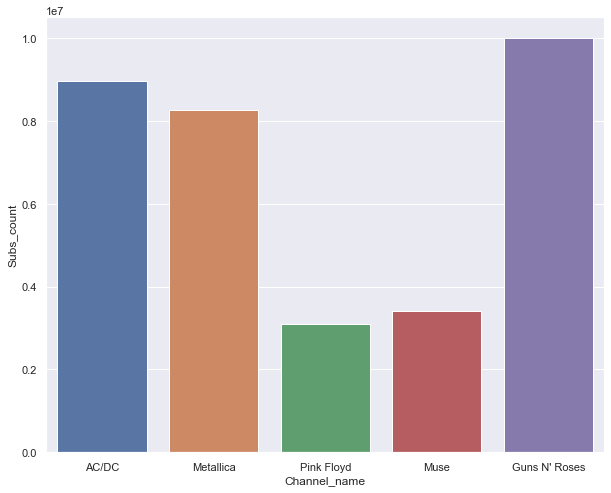

In [63]:
# Visualizing subscribers count
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subs_count', data=df)

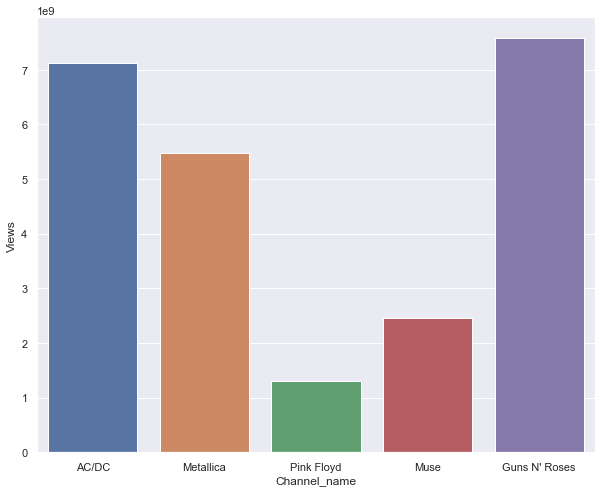

In [53]:
# Views vizualisation
ax = sns.barplot(x='Channel_name', y='Views', data=df)

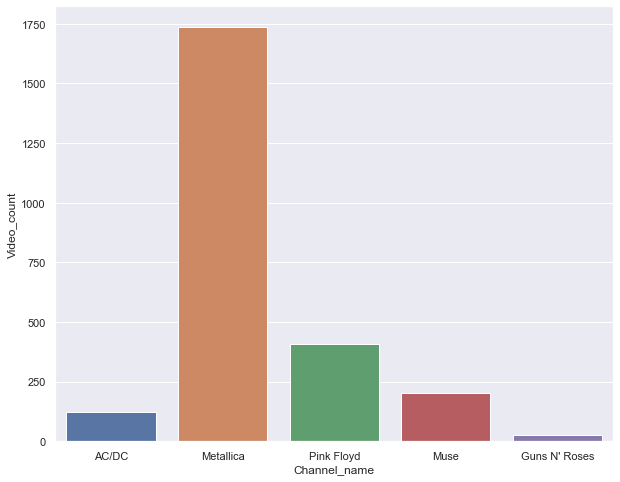

In [66]:
# Videos count
ax = sns.barplot(x='Channel_name', y='Video_count', data=df)

## Scraping and analyzing videos data

In [68]:
# First let's change our function to grab the playlist ID with all channel videos

def channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(part='snippet,contentDetails,statistics', id=','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                     Subs_count = response['items'][i]['statistics']['subscriberCount'],
                     Views = response['items'][i]['statistics']['viewCount'],
                     Video_count = response['items'][i]['statistics']['videoCount'],
                     Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [69]:
stats = channel_stats(youtube, channel_ids)
df = pd.DataFrame(stats)
df
# Looks good

,Channel_name,Subs_count,Views,Video_count,Playlist_id
0,Pink Floyd,3090000,1312829344,407,UUY2qt3dw2TQJxvBrDiYGHdQ
1,Guns N' Roses,10000000,7578840509,26,UUIak6JLVOjqhStxrL1Lcytw
2,AC/DC,8970000,7122410564,122,UUB0JSO6d5ysH2Mmqz5I9rIw
3,Muse,3410000,2464263688,202,UUGGhM6XCSJFQ6DTRffnKRIw
4,Metallica,8270000,5472418457,1736,UUbulh9WdLtEXiooRcYK7SWw


In [107]:
playlist_id = df.loc[df['Channel_name'] == 'Muse', 'Playlist_id'].iloc[0]
playlist_id

'UUGGhM6XCSJFQ6DTRffnKRIw'

In [108]:
# Gettinng video IDs

def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id)
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    
    return video_ids

In [109]:
video_ids = get_video_ids(youtube, playlist_id)

### Extracting data from those videos

In [112]:
def get_video_detail(youtube, video_ids):
    
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(part='snippet,statistics',
                                        id = ','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments_count = video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
        
    return all_video_stats

In [132]:
video_details = get_video_detail(youtube, video_ids)

In [117]:
# Passing data into dataframe
videos_df = pd.DataFrame(video_details)
videos_df

,Title,Published,Views,Likes,Comments_count
0,Muse - Fall into line #shorts,2022-04-10T14:08:18Z,74616,4455,124
1,MUSE - COMPLIANCE [Official Music Video],2022-03-17T16:00:11Z,2804633,81728,6574
2,Muse - Compliance #shorts,2022-03-16T21:41:50Z,44069,3307,66
3,Muse - Compliance #shorts,2022-03-11T15:07:42Z,58508,3955,225
4,MUSE,2022-03-09T15:00:42Z,501328,29395,2441
...,...,...,...,...,...
197,Muse - Knights Of Cydonia: Live At Wembley Sta...,2008-03-17T13:21:12Z,28446343,126116,15907
198,Muse - Invincible (Video),2007-03-22T12:29:26Z,13121277,45682,4395
199,Muse - Knights Of Cydonia (Video),2006-12-01T12:19:56Z,42393538,225388,15777
200,Muse - Starlight [Official Music Video],2006-12-01T12:14:53Z,159636247,743466,28033


In [121]:
videos_df.dtypes

Title             object
Published         object
Views             object
Likes             object
Comments_count    object
dtype: object

In [124]:
# Converting numerical values from obj to int
videos_df[['Views', 'Likes', 'Comments_count']] = videos_df[['Views', 'Likes', 'Comments_count']].astype('int64')
videos_df.dtypes

Title             object
Published         object
Views              int64
Likes              int64
Comments_count     int64
dtype: object

In [128]:
# Now let's look at top 10 most liked videos of channel
top10_liked = videos_df.sort_values(by='Likes', ascending=False).head(10)
top10_liked

,Title,Published,Views,Likes,Comments_count
192,Muse - Uprising [Official Video],2009-10-09T13:15:12Z,234154397,1284513,63766
147,Muse - Madness,2012-09-05T07:00:58Z,153298008,791091,38214
200,Muse - Starlight [Official Music Video],2006-12-01T12:14:53Z,159636247,743466,28033
124,Muse - Psycho [Official Lyric Video],2015-03-12T17:47:19Z,74825494,579925,22465
166,Muse - Resistance,2010-02-10T12:12:41Z,119063185,465602,21370
191,Muse - Undisclosed Desires,2009-11-04T10:54:29Z,105970287,459342,20301
187,Muse - Hysteria [Official Music Video],2010-02-08T16:01:25Z,93557645,440852,15195
181,Muse - Feeling Good (Video),2010-02-08T16:11:54Z,64975141,419473,14075
162,Muse - Time Is Running Out (video),2010-02-16T09:23:58Z,71173020,375543,8319
201,Muse - Supermassive Black Hole [Official Music...,2006-12-01T12:06:00Z,59140227,299545,26266


<AxesSubplot:xlabel='Likes', ylabel='Title'>

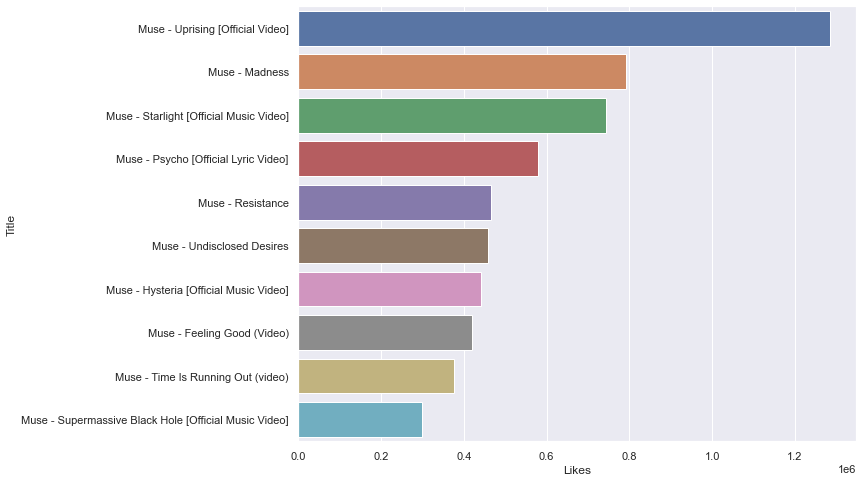

In [158]:
# Visualizing likes count
sns.barplot(x='Likes', y='Title', data=top10_liked)

In [146]:
# Now I wanna see published videos count by months 
# First I'm creating new column called 'Month'

videos_df['Month'] = pd.to_datetime(videos_df['Published']).dt.strftime('%b')
videos_df.Month

0      Apr
1      Mar
2      Mar
3      Mar
4      Mar
      ... 
197    Mar
198    Mar
199    Dec
200    Dec
201    Dec
Name: Month, Length: 202, dtype: object

In [147]:
# Then grouping by 'Month' coulumn to see videos count per every month
 
videos_per_m = videos_df.groupby('Month', as_index=False).size()
videos_per_m

,Month,size
0,Apr,17
1,Aug,9
2,Dec,11
3,Feb,41
4,Jan,12
5,Jul,8
6,Jun,19
7,Mar,22
8,May,18
9,Nov,31


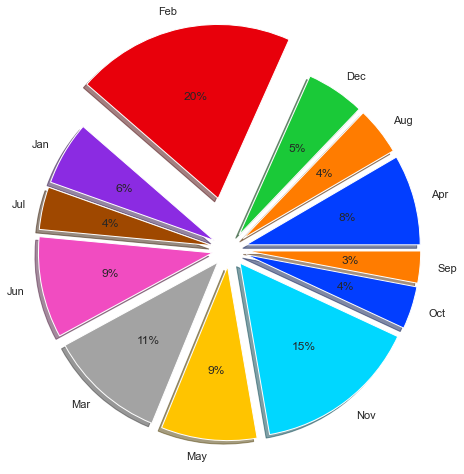

In [190]:
explode = [0.1,0.1,0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(videos_per_m['size'], labels=videos_per_m['Month'], autopct = '%0.0f%%', 
        shadow=True, explode=explode, colors = sns.color_palette('bright'))
plt.show()